Miguel de Jesús Palacios RIvera 209654

Sin gráfico:

In [6]:
import numpy as np
from joblib import Parallel, delayed
import multiprocessing
import time

# Example array with 100000 random numbers
data = np.random.rand(100000)

# Function to calculate the square of a number
def square(x):
  return x**2

# 1. Using a for loop
start_time = time.time()
sum_for = 0
for x in data:
  sum_for += x**2
end_time = time.time()
print(f"Sum using for loop: {sum_for} - Time: {end_time - start_time} seconds")

# 2. Using NumPy vectorization
start_time = time.time()
sum_np = np.sum(data**2)
end_time = time.time()
print(f"Sum using NumPy: {sum_np} - Time: {end_time - start_time} seconds")

# 3. Using joblib
start_time = time.time()
results = Parallel(n_jobs=-1)(delayed(square)(x) for x in data)
sum_joblib = np.sum(results)
end_time = time.time()
print(f"Sum using joblib: {sum_joblib} - Time: {end_time - start_time} seconds")

# 4. Using multiprocessing
start_time = time.time()
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
results = pool.map(square, data)
pool.close()
pool.join()
sum_multiprocessing = np.sum(results)
end_time = time.time()
print(f"Sum using multiprocessing: {sum_multiprocessing} - Time: {end_time - start_time} seconds")

Sum using for loop: 33261.49484005203 - Time: 0.034117937088012695 seconds
Sum using NumPy: 33261.49484005186 - Time: 0.0013244152069091797 seconds
Sum using joblib: 33261.49484005186 - Time: 1.1540131568908691 seconds
Sum using multiprocessing: 33261.49484005186 - Time: 0.7009296417236328 seconds


Con gráfico:

for:
  Mean: 0.1299 seconds
  Standard Deviation: 0.1238 seconds
numpy:
  Mean: 0.0018 seconds
  Standard Deviation: 0.0030 seconds
joblib:
  Mean: 2.5228 seconds
  Standard Deviation: 1.6810 seconds
multiprocessing:
  Mean: 1.2213 seconds
  Standard Deviation: 0.7714 seconds


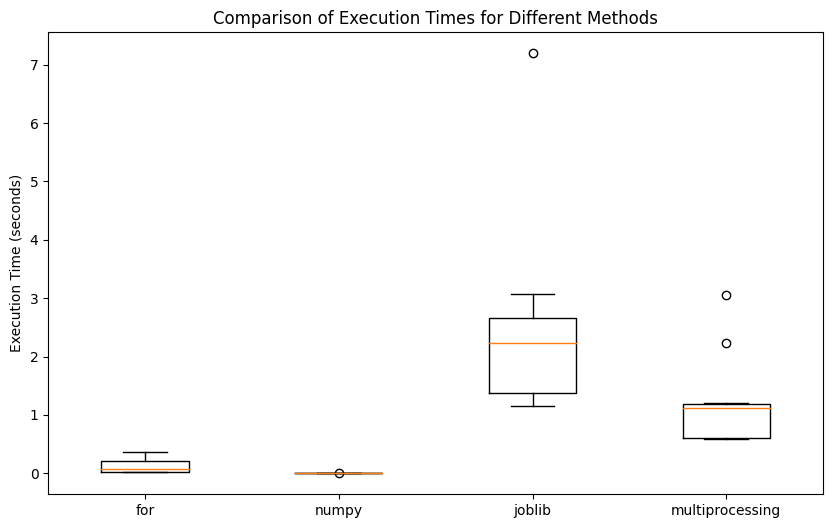

In [1]:
import numpy as np
from joblib import Parallel, delayed
import multiprocessing
import time
import matplotlib.pyplot as plt

# Example array with 100000 random numbers
data = np.random.rand(100000)

# Function to calculate the square of a number
def square(x):
  return x**2

# Number of experiments to run
num_experiments = 10

# Store the results for each method
results = {
    "for": [],
    "numpy": [],
    "joblib": [],
    "multiprocessing": []
}

# Run the experiments
for _ in range(num_experiments):
  # 1. Using a for loop
  start_time = time.time()
  sum_for = 0
  for x in data:
    sum_for += x**2
  end_time = time.time()
  results["for"].append(end_time - start_time)

  # 2. Using NumPy vectorization
  start_time = time.time()
  sum_np = np.sum(data**2)
  end_time = time.time()
  results["numpy"].append(end_time - start_time)

  # 3. Using joblib
  start_time = time.time()
  temp_results = Parallel(n_jobs=-1)(delayed(square)(x) for x in data)
  sum_joblib = np.sum(temp_results)
  end_time = time.time()
  results["joblib"].append(end_time - start_time)

  # 4. Using multiprocessing
  start_time = time.time()
  pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
  temp_results = pool.map(square, data)
  pool.close()
  pool.join()
  sum_multiprocessing = np.sum(temp_results)
  end_time = time.time()
  results["multiprocessing"].append(end_time - start_time)

# Calculate basic statistics
for method, times in results.items():
  print(f"{method}:")
  print(f"  Mean: {np.mean(times):.4f} seconds")
  print(f"  Standard Deviation: {np.std(times):.4f} seconds")

# Create a box plot to compare execution times
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.ylabel("Execution Time (seconds)")
plt.title("Comparison of Execution Times for Different Methods")
plt.show()

In [ ]:
import numpy as np
from joblib import Parallel, delayed
import multiprocessing
import time
import matplotlib.pyplot as plt

# Example array with 100000 random numbers
data = np.random.rand(100000)

# Function to calculate the square of a number
def square(x):
  return x**2

# Number of experiments to run
num_experiments = 10

# Store the results for each method
results = {
    "for": [],
    "numpy": [],
    "joblib": [],
    "multiprocessing": []
}

# Run the experiments
for _ in range(num_experiments):
  # 1. Using a for loop
  start_time = time.time()
  sum_for = 0
  for x in data:
    sum_for += x**2
  end_time = time.time()
  results["for"].append(end_time - start_time)

  # 2. Using NumPy vectorization
  start_time = time.time()
  sum_np = np.sum(data**2)
  end_time = time.time()
  results["numpy"].append(end_time - start_time)

  # 3. Using joblib
  start_time = time.time()
  temp_results = Parallel(n_jobs=-1)(delayed(square)(x) for x in data)
  sum_joblib = np.sum(temp_results)
  end_time = time.time()
  results["joblib"].append(end_time - start_time)

  # 4. Using multiprocessing
  start_time = time.time()
  pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
  temp_results = pool.map(square, data)
  pool.close()
  pool.join()
  sum_multiprocessing = np.sum(temp_results)
  end_time = time.time()
  results["multiprocessing"].append(end_time - start_time)

# Calculate basic statistics
for method, times in results.items():
  print(f"{method}:")
  print(f"  Mean: {np.mean(times):.4f} seconds")
  print(f"  Standard Deviation: {np.std(times):.4f} seconds")

# Create a box plot to compare execution times
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.ylabel("Execution Time (seconds)")
plt.title("Comparison of Execution Times for Different Methods")
plt.show()